In [1]:
import requests
import pandas as pd
import datetime

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [3]:

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

#https://openweathermap.org/api/one-call-3#how       How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"


In [4]:

# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()       #pass response to weather_data object(dictionary)


In [5]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [6]:
weather_data['list'][0]

{'dt': 1698991200,
 'main': {'temp': 302.27,
  'feels_like': 301.39,
  'temp_min': 302.27,
  'temp_max': 302.27,
  'pressure': 1013,
  'sea_level': 1013,
  'grnd_level': 950,
  'humidity': 34,
  'temp_kf': 0},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'clouds': {'all': 39},
 'wind': {'speed': 2.42, 'deg': 97, 'gust': 2.41},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'd'},
 'dt_txt': '2023-11-03 06:00:00'}

In [7]:
len(weather_data['list'])

40

In [8]:
weather_data['list'][0]['weather'][0]['description']

'scattered clouds'

In [9]:
temperatures = [item['main']['temp'] for item in weather_data['list']]
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})

weather_df.set_index('Timestamp', inplace=True)

In [10]:
max_temp = weather_df['Temperature'].max()

In [11]:
max_temp

305.14

In [12]:
min_temp = weather_df['Temperature'].min()

In [13]:
min_temp

294.1

In [14]:
weather_df.fillna(0, inplace=True)

weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)

print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2023-11-03 06:00:00        29.12        34        2.42    scattered clouds
2023-11-03 09:00:00        29.79        31        1.15       broken clouds
2023-11-03 12:00:00        29.68        34        0.98       broken clouds
2023-11-03 15:00:00        25.74        38        0.57    scattered clouds
2023-11-03 18:00:00        24.40        41        3.23       broken clouds
2023-11-03 21:00:00        22.42        48        1.97     overcast clouds
2023-11-04 00:00:00        20.95        54        1.82     overcast clouds
2023-11-04 03:00:00        24.76        45        2.54       broken clouds
2023-11-04 06:00:00        30.03        35        3.94    scattered clouds
2023-11-04 09:00:00        31.97        30        2.32    scattered clouds
2023-11-04 12:00:00        30.47        34        2.29       broken clouds
2023-11-04 15:00:00      

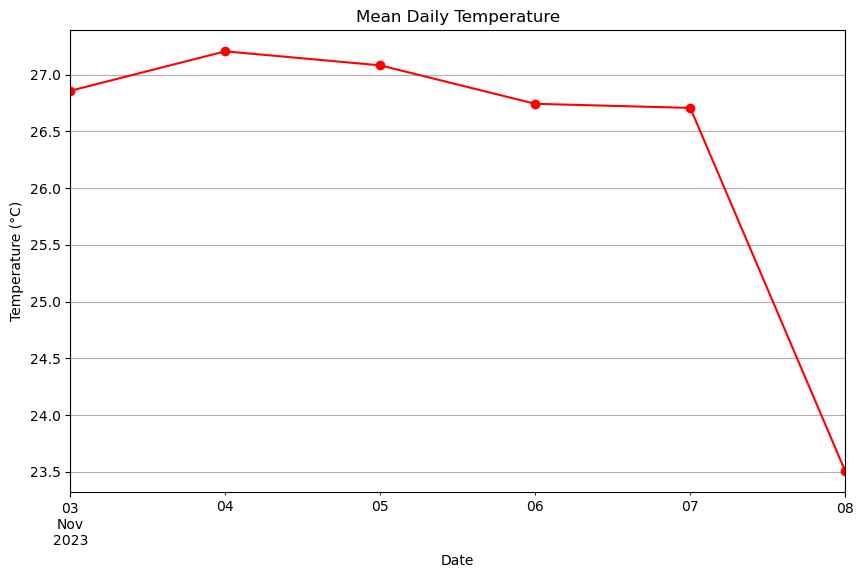

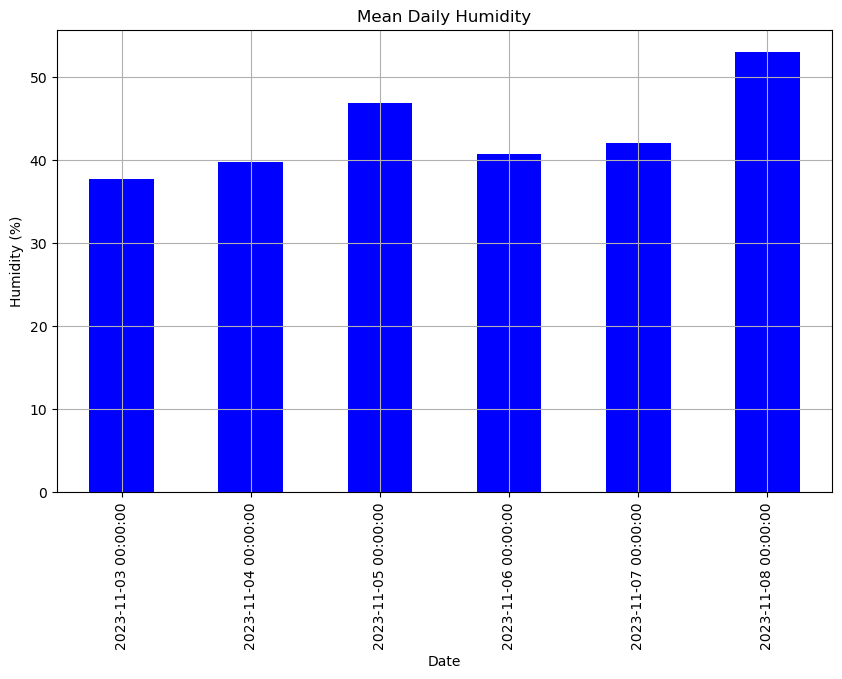

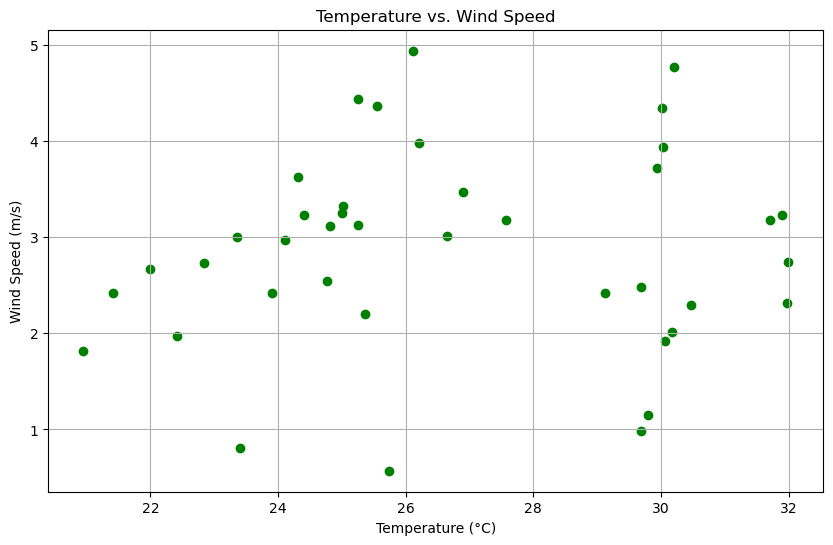

In [15]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

###Heatmap

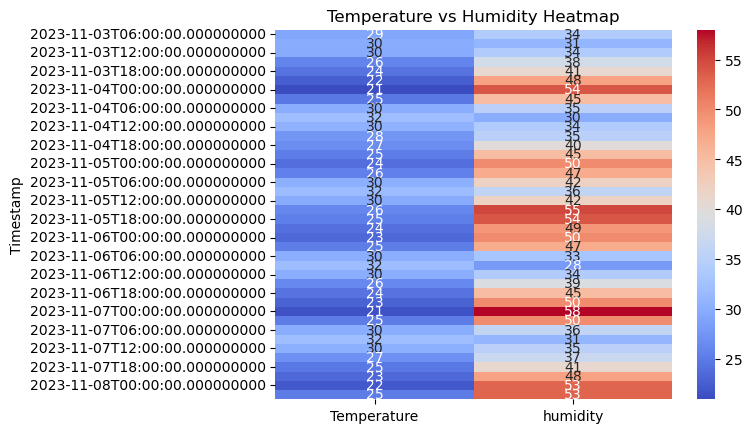

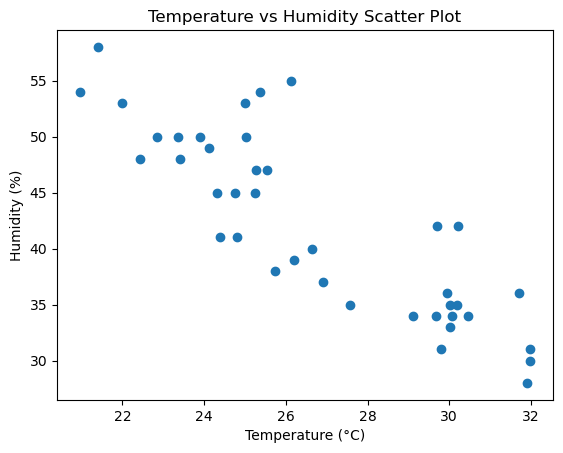

In [16]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

###Geospatial Map

In [20]:
import requests
import pandas as pd
import geopandas as gpd
import folium
api_key = 'fb365aa6104829b44455572365ff3b4e'
locations = ['London', 'Paris', 'New York']
weather_df = pd.DataFrame()
for location in locations:
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'
    response = requests.get(api_url)
    weather_data = response.json()
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    weather_df = weather_df.append(location_df, ignore_index=True)


ModuleNotFoundError: No module named 'geopandas'

In [19]:
weather_df

,Temperature,humidity,wind_speed,weather_description
Timestamp,,,,
2023-11-03 06:00:00,29.12,34,2.42,scattered clouds
2023-11-03 09:00:00,29.79,31,1.15,broken clouds
2023-11-03 12:00:00,29.68,34,0.98,broken clouds
2023-11-03 15:00:00,25.74,38,0.57,scattered clouds
2023-11-03 18:00:00,24.40,41,3.23,broken clouds
2023-11-03 21:00:00,22.42,48,1.97,overcast clouds
2023-11-04 00:00:00,20.95,54,1.82,overcast clouds
2023-11-04 03:00:00,24.76,45,2.54,broken clouds
2023-11-04 06:00:00,30.03,35,3.94,scattered clouds


In [18]:

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

world_map.rename(columns={'name': 'Location'}, inplace=True)

weather_map = world_map.merge(weather_df, on='Location')

map_center = [weather_df['Latitude'].mean(), weather_df['Longitude'].mean()]
weather_map_folium = folium.Map(location=map_center, zoom_start=2)

for index, row in weather_map.iterrows():
    location = [row['Latitude'], row['Longitude']]
    temperature = row['Temperature']
    marker_text = f'Temperature: {temperature} K'
    folium.Marker(location, popup=marker_text, icon=folium.Icon(icon='cloud', color='red')).add_to(weather_map_folium)

weather_map_folium


NameError: name 'gpd' is not defined

In [ ]:
type(weather_map_folium)

folium.folium.Map